<a href="https://colab.research.google.com/github/ahalyamukundan24/Case_Study_on_Supervised_Learning/blob/main/Linear_Regression_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📓 Linear Regression from Scratch

### 🎯 Objective
- Implement a linear regression model using gradient descent.
- Derive the gradient updates, write a scikit-learn-like class, and evaluate using synthetic data.
- Compare the result of the same with library code output
- Use R2-Score and Mean Absolute Percentage error as Performance metric on test data

## 📊 Generate Synthetic Data

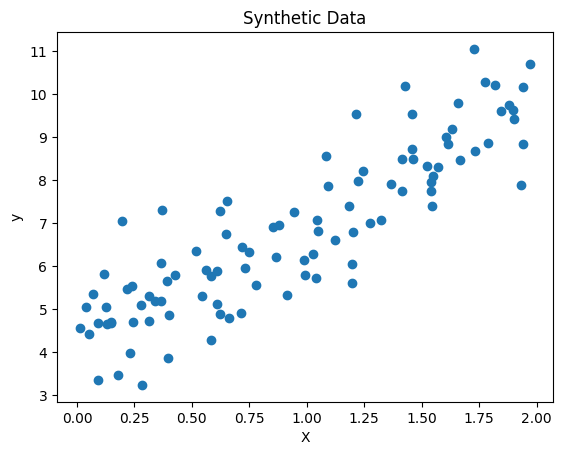

In [1]:

import numpy as np
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(42)

# Generate synthetic data
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Plot
plt.scatter(X, y)
plt.xlabel("X")
plt.ylabel("y")
plt.title("Synthetic Data")
plt.show()


## Do Train-Test Split (75%-25%)

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

## Do the Linear Regression with Scikit-Learn Library

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_percentage_error

model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

y_pred_lr = model_lr.predict(X_test)

print("R2 Score:", r2_score(y_test, y_pred_lr))
print("MAPE:", mean_absolute_percentage_error(y_test, y_pred_lr))

R2 Score: 0.8310990846073661
MAPE: 0.08475682819153892


## Do Ridge and Lasso Regression and Compare the evaluation metrics in a table

In [4]:
from sklearn.linear_model import Ridge, Lasso
import pandas as pd

ridge = Ridge(alpha=1.0)
lasso = Lasso(alpha=0.1)

ridge.fit(X_train, y_train)
lasso.fit(X_train, y_train)

ridge_pred = ridge.predict(X_test)
lasso_pred = lasso.predict(X_test)

results = pd.DataFrame({
    "Model": ["Linear", "Ridge", "Lasso"],
    "R2 Score": [
        r2_score(y_test, y_pred_lr),
        r2_score(y_test, ridge_pred),
        r2_score(y_test, lasso_pred)
    ],
    "MAPE": [
        mean_absolute_percentage_error(y_test, y_pred_lr),
        mean_absolute_percentage_error(y_test, ridge_pred),
        mean_absolute_percentage_error(y_test, lasso_pred)
    ]
})

results

,Model,R2 Score,MAPE
0,Linear,0.831099,0.084757
1,Ridge,0.825999,0.082412
2,Lasso,0.809082,0.082640


## Custom Implementation

## 🧮 Derive the Gradient Updates
Use the chain rule to derive the gradients of the loss function (Mean Square Error):

$$ \text{Loss} = \frac{1}{N} \sum_{i=1}^{N} (y_i - (mx_i + c))^2 $$

Derive:
- ∂Loss/∂m
- ∂Loss/∂c

Write the derivation here/add screenshot of your derivation here:

## 🧠 Custom Linear Regression Class

In [12]:
import numpy as np

class MyLinearRegression:

    def __init__(self):
        self.m = 0
        self.c = 0

    def fit(self, X, y, lr=0.01, n_iters=1000):
        n = len(X)

        for _ in range(n_iters):
            y_pred = self.m * X + self.c

            dm = (-2/n) * np.sum(X * (y - y_pred))
            dc = (-2/n) * np.sum(y - y_pred)

            self.m -= lr * dm
            self.c -= lr * dc
            self.coef_ = self.m
            self.intercept_ = self.c

    def predict(self, X):
        return self.m * X + self.c

    def fit_transform(self, X, y, lr=0.01, n_iters=1000):
        self.fit(X, y, lr, n_iters)
        return self.predict(X)

## 🔁 Train the Model and Visualize the Fit

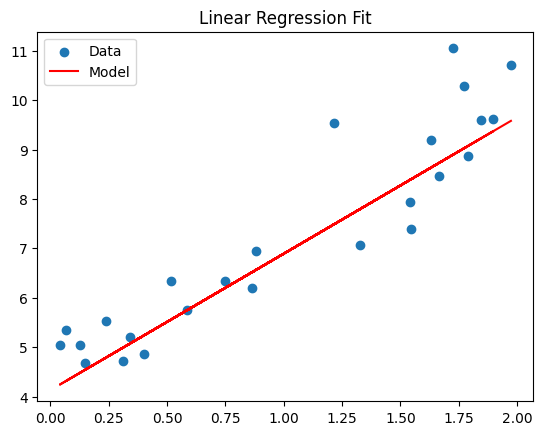

Learned coefficients (m, c): 2.760287211333097


In [13]:
model = MyLinearRegression()
model.fit(X_train, y_train, lr=0.1, n_iters=100)

# Predictions
y_pred = model.predict(X_test)

# Plot
plt.scatter(X_test, y_test, label="Data")
plt.plot(X_test, y_pred, color="red", label="Model")
plt.legend()
plt.title("Linear Regression Fit")
plt.show()

# Print coefficients
print("Learned coefficients (m, c):", model.coef_)

## 📉 Plot the Loss Curve

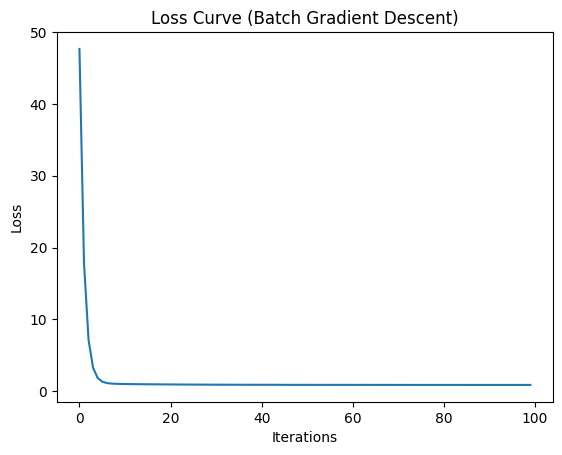

In [16]:
losses = []

m, c = 0, 0
lr = 0.1
n = len(X_train)

for _ in range(100):
    y_pred = m * X_train + c
    loss = np.mean((y_train - y_pred) ** 2)
    losses.append(loss)

    dm = (-2/n) * np.sum(X_train * (y_train - y_pred))
    dc = (-2/n) * np.sum(y_train - y_pred)

    m -= lr * dm
    c -= lr * dc

plt.plot(losses)
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("Loss Curve (Batch Gradient Descent)")
plt.show()

## 🌟 Bonus Task: Stochastic Gradient Descent
Implement a class `MyLinearRegressionSGD` that uses one training sample per iteration to update weights.

In [17]:
class MyLinearRegressionSGD:

    def __init__(self):
        self.m = 0
        self.c = 0
        self.losses = []

    def fit(self, X, y, lr=0.01, n_iters=100):

        n = len(X)

        for _ in range(n_iters):
            for i in range(n):

                xi = X[i]
                yi = y[i]

                y_pred = self.m * xi + self.c
                error = yi - y_pred

                dm = -2 * xi * error
                dc = -2 * error

                self.m -= lr * dm
                self.c -= lr * dc

            loss = np.mean((y - (self.m * X + self.c))**2)
            self.losses.append(loss)

    def predict(self, X):
        return self.m * X + self.c

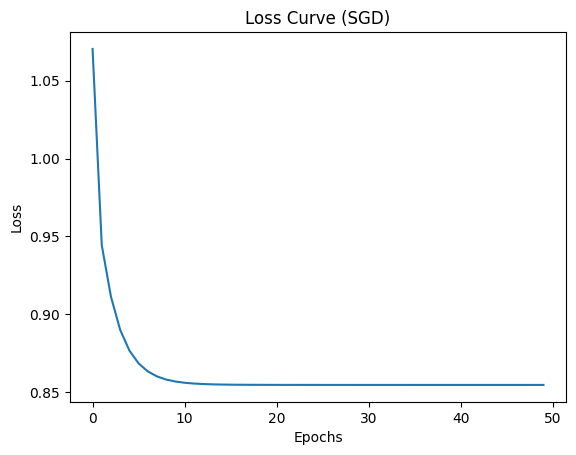

In [18]:
# Plot loss curve while using Stochastic Gradient Descent
sgd_model = MyLinearRegressionSGD()
sgd_model.fit(X_train, y_train, lr=0.01, n_iters=50)

plt.plot(sgd_model.losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Curve (SGD)")
plt.show()

## Visualize the prediction result of Library version and Custom regression code created

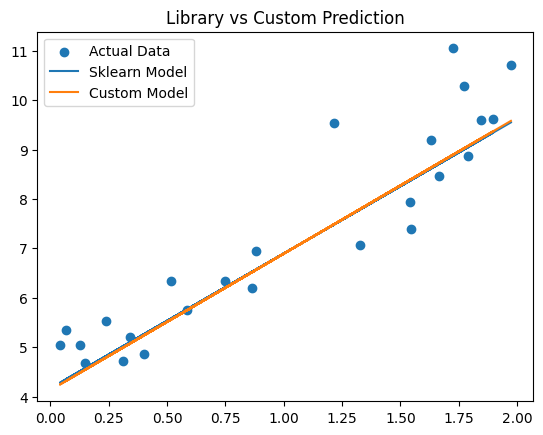

In [19]:
plt.scatter(X_test, y_test, label="Actual Data")

plt.plot(X_test, y_pred_lr, label="Sklearn Model")
plt.plot(X_test, model.predict(X_test), label="Custom Model")

plt.legend()
plt.title("Library vs Custom Prediction")
plt.show()

## ✅ Checklist
- [ ] Did linear regression using scikit-learn API
- [ ] Did Ridge and Lasso regression and compiled the result (R2 and MAPE) as a table
- [ ] Derived gradients using chain rule
- [ ] Implemented custom Linear Regression class
- [ ] Trained using gradient descent
- [ ] Visualized predictions and loss
- [ ] Implemented stochastic gradient descent (bonus)
- [ ] Visualized predictions and loss for stochastic gradient descent (bonus)
- [ ] Visualize the prediction result of Library version and custom version